##  Task 1: Import libraries and packages

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
import seaborn as sns
from pandas.plotting import scatter_matrix

## Task 2: Exploratory Data Analysis

In [31]:
# Load training data
df_tr_lbl = pd.read_csv('data/train.csv')
df_tr_lbl.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,0.0,0.250117,3.855909,1.559645,0.0,0.0,0.313103,0.029861,3.881555,0.0,0.171659,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,0.0,0.234776,4.075678,2.159440,0.0,0.0,0.286234,0.026458,4.587366,0.0,0.151063,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


### Task 2.1:  Xử lí data với id và cycle, std, ttf 

__TTF - Time-To-Failure: Thời gian không hỏng hóc__

In [32]:
# get cài đăt hoạt động của động cơ và cảm biến
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6',
           's7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17',
           's18','s19','s20','s21']

In [33]:
featurs

['setting1',
 'setting2',
 'setting3',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15',
 's16',
 's17',
 's18',
 's19',
 's20',
 's21']

In [34]:
# Độ lệch chuẩn std
featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

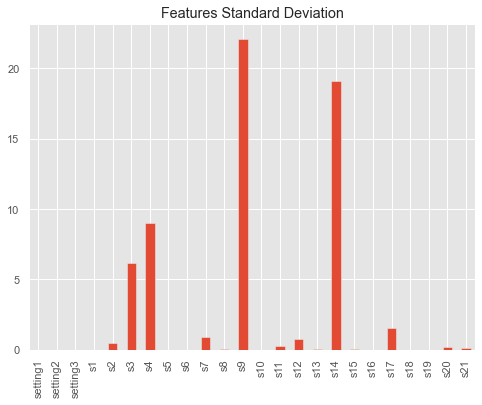

In [35]:
# Vẽ và so sánh độ lệch chuẩn
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), 
                              title="Features Standard Deviation");

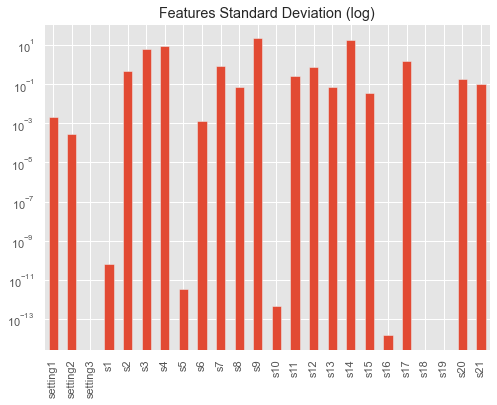

In [36]:
# Độ lệch chuẩn thể hiện dưới dạng log
df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,
                              title="Features Standard Deviation (log)");

In [38]:
# TTF - Time-To-Failure: Thời gian không hỏng hóc
df_tr_lbl['ttf']

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: ttf, Length: 20631, dtype: int64

In [39]:
# get list features xem sự tương quan với regression label ttf
df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -1.280033e-18
s5         -1.280033e-18
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

__setting3, s1, s10, s18, s19 bị NaN__                    

In [40]:
# setting3, s1, s10, s18, s19 thấp hoặc không có tương quan với regression label ttf hoặc không có độ lệch chuẩn
# Những feature này có thể bị loại bỏ
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [41]:
# Danh sách features có tương quan cao với regression label ttf
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 
                  's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


__s12, s7, s21, s20, s6, s14, s9, s13, s8, s3, s17, s2, s15, s4, s11 là mục tiêu lựa chọn feature trong quá trình lập model. Vì mối tương quan của nó với TTF cao hơn các feature khác.__

### Task 2.2. Hiển thị mối tương quan giữa các feature trên Heatmap

In [42]:
# Thêm regression label 'ttf' vào list feature có tương quan cao.
correl_featurs_lbl = correl_featurs + ['ttf']


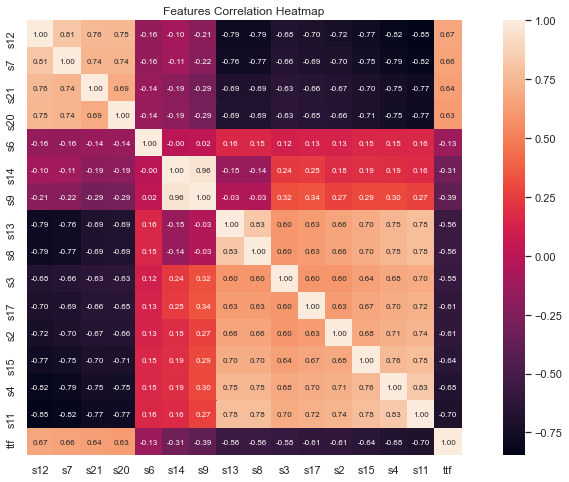

In [43]:
# Vẽ biểu đồ heatmap hiển thị tương quan +ve và -ve giữa các features and regression label.
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(15, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

__-Hiển thị trong bản đồ nhiệt (heatmap) tương quan các tính năng ở trên, có mối tương quan rất cao (> 0,8) giữa
các cặp biến độc lập sau: (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8, s13), (s7, s12).__

__-s20, s21, s7 và s12 có mối tương quan thuận với biến phụ thuộc (ttf) trong khoảng 0,63 đến 0,67.__

__-s17, s2, s15, s4, s11 có mối tương quan nghịch với biến phụ thuộc (ttf) trong khoảng từ 0,61 đến
0,70.__

Sự đa cộng tuyến này có thể ảnh hưởng đến hiệu suất của một số thuật toán học máy. Vì vậy, một phần của
các tính năng này sẽ là mục tiêu để loại bỏ trong việc lựa chọn tính năng trong giai đoạn mô hình hóa.

### Task2.3. Scatter matrix 

In [44]:
#reset matplotlib original theme
sns.reset_orig()

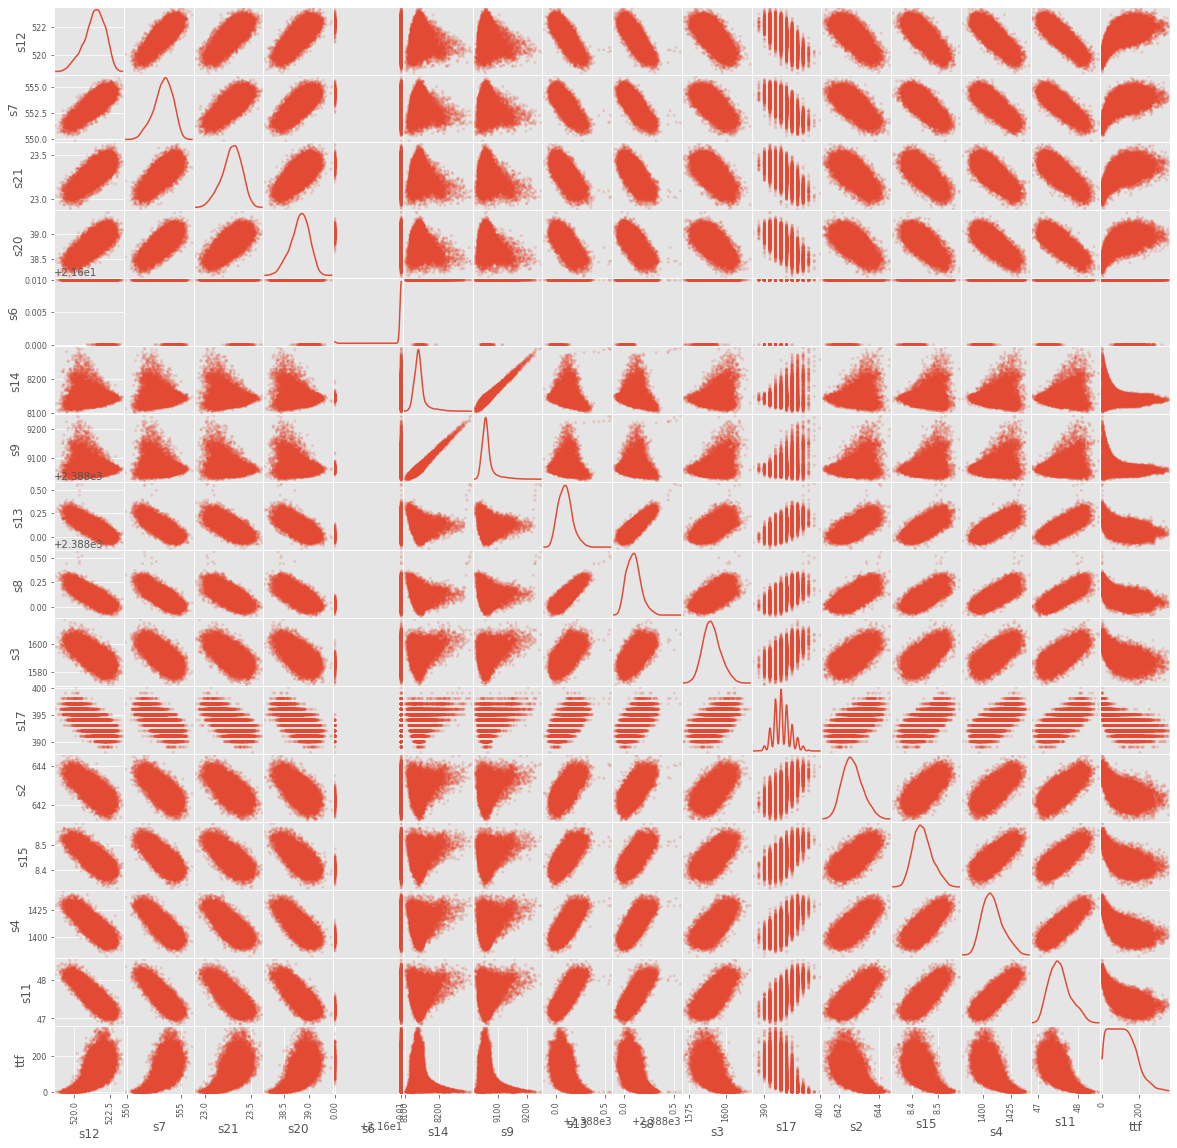

In [45]:
# Ma trận phân tán (scatter matrix) được sử dụng để kiểm tra sự phân bố và tương quan của các features
# Tạo scatter matrix hiển thị mối liên hệ và phân chia features và regression label
scatter_matrix(df_tr_lbl[correl_featurs_lbl], alpha=0.2, figsize=(20, 20), diagonal='kde');

__Hầu hết các tính năng có phân phối chuẩn có ảnh hưởng tích cực đến các thuật toán Machine Learning__

__Hầu hết các features có mối quan hệ non-linear với  regression label ttf, nên việc sử dụng mô hình đa thức (polynomial models) dẫn đến kết quả tốt hơn.__

### Task2.4. Tạo function để phân tích từng feature invidually

In [70]:
def explore_col(s, e):
    
    """Vẽ 4 biểu đồ chính cho 1 feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): Tên cột tính năng được vẽ.
        e (int): Số động cơ ngẫu nhiên được vẽ cho ô 3. Phạm vi từ 1 -100, 0: tất cả động cơ,> 100: tất cả động cơ.
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

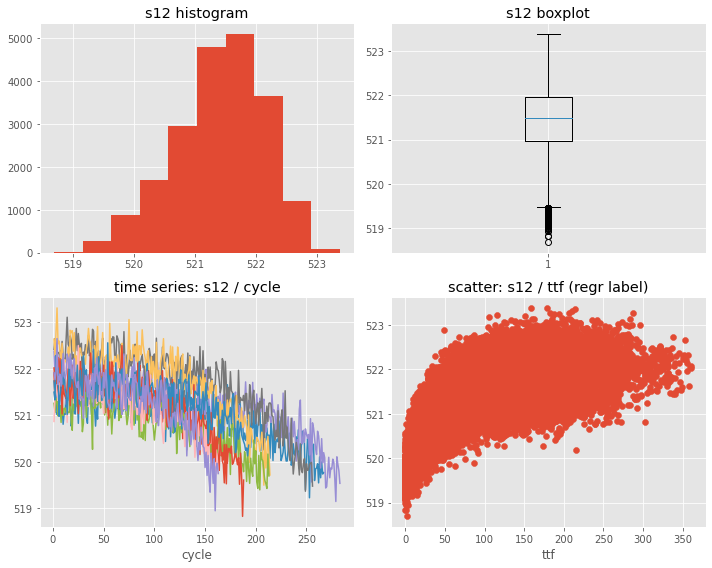

In [71]:
explore_col("s12", 10)

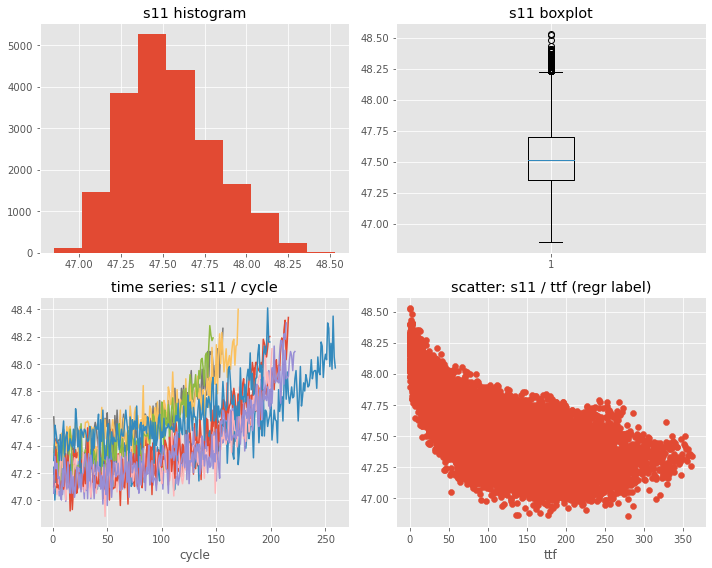

In [72]:
explore_col("s11", 10)

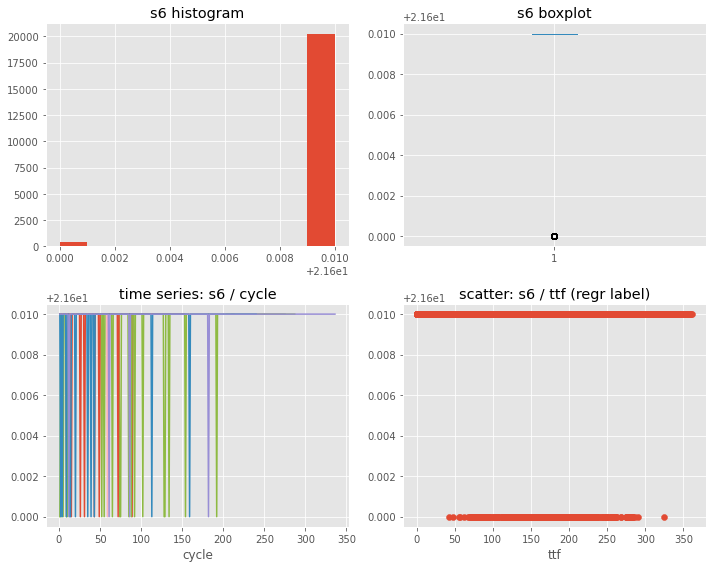

In [73]:
explore_col("s6", 10)

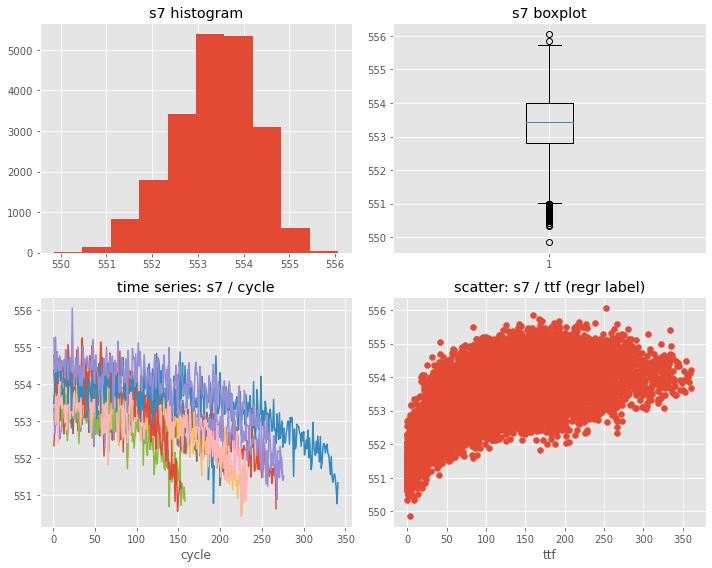

In [74]:
explore_col("s7", 10)

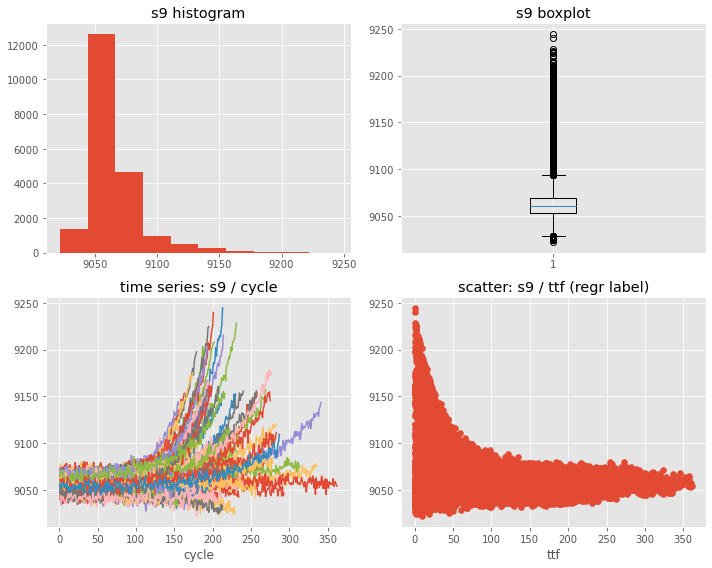

In [75]:
explore_col("s9", 100)

### Task 2.5.Tạo function xem xét thời gian với mỗi cảm biến (sensor) random động cơ (engines)

In [85]:
def plot_time_series(s):
    
    """Vẽ biểu đồ time series của một cảm biến duy nhất cho 10 động cơ mẫu ngẫu nhiên.

        s (str): Tên cột của cảm biến được vẽ biểu đồ.  
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
       


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

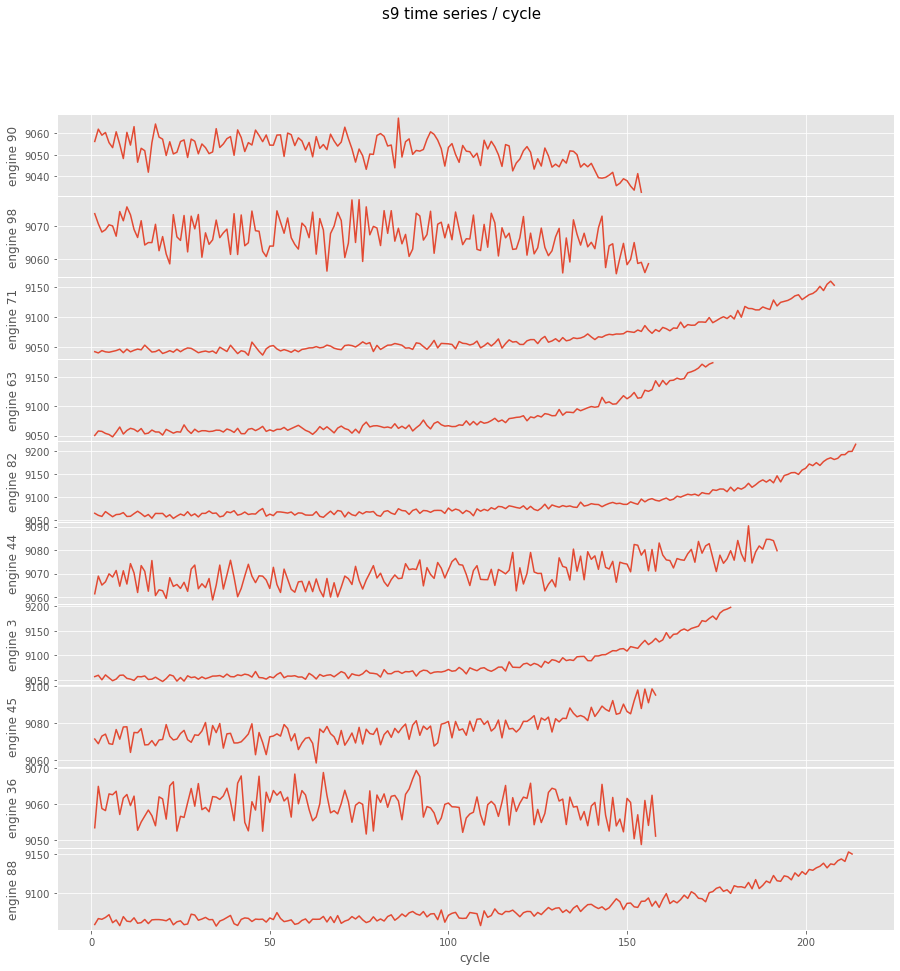

In [86]:
plot_time_series('s9')

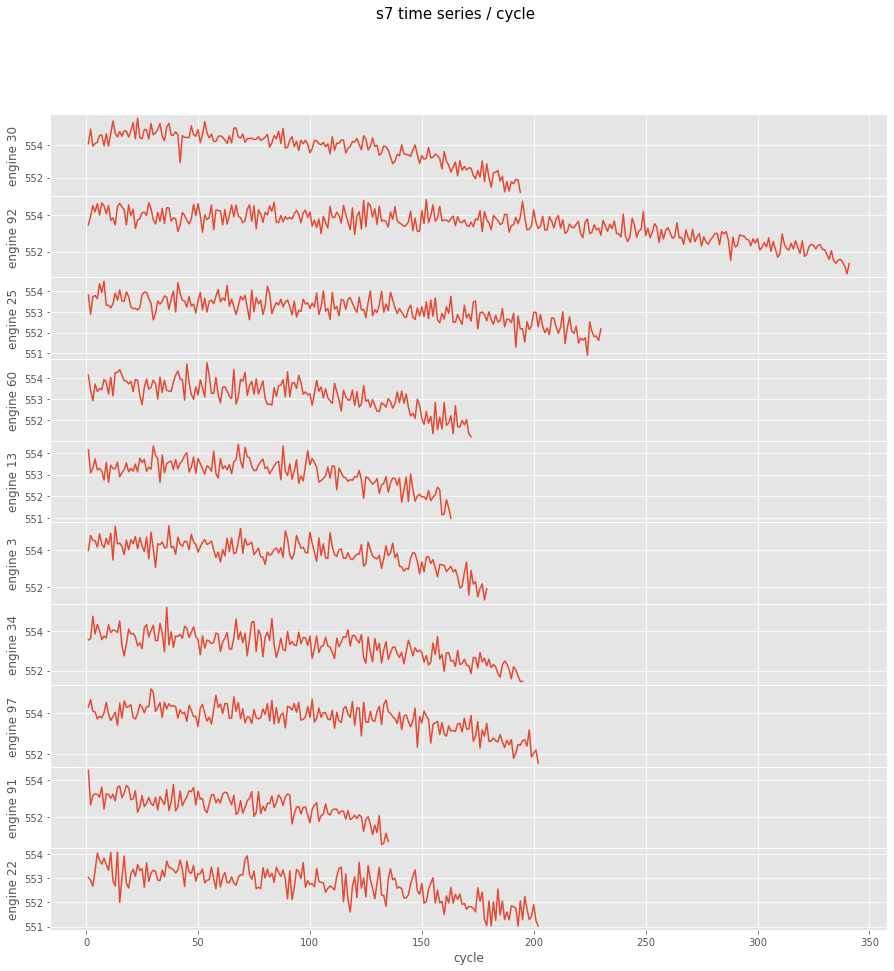

In [87]:
plot_time_series('s7')

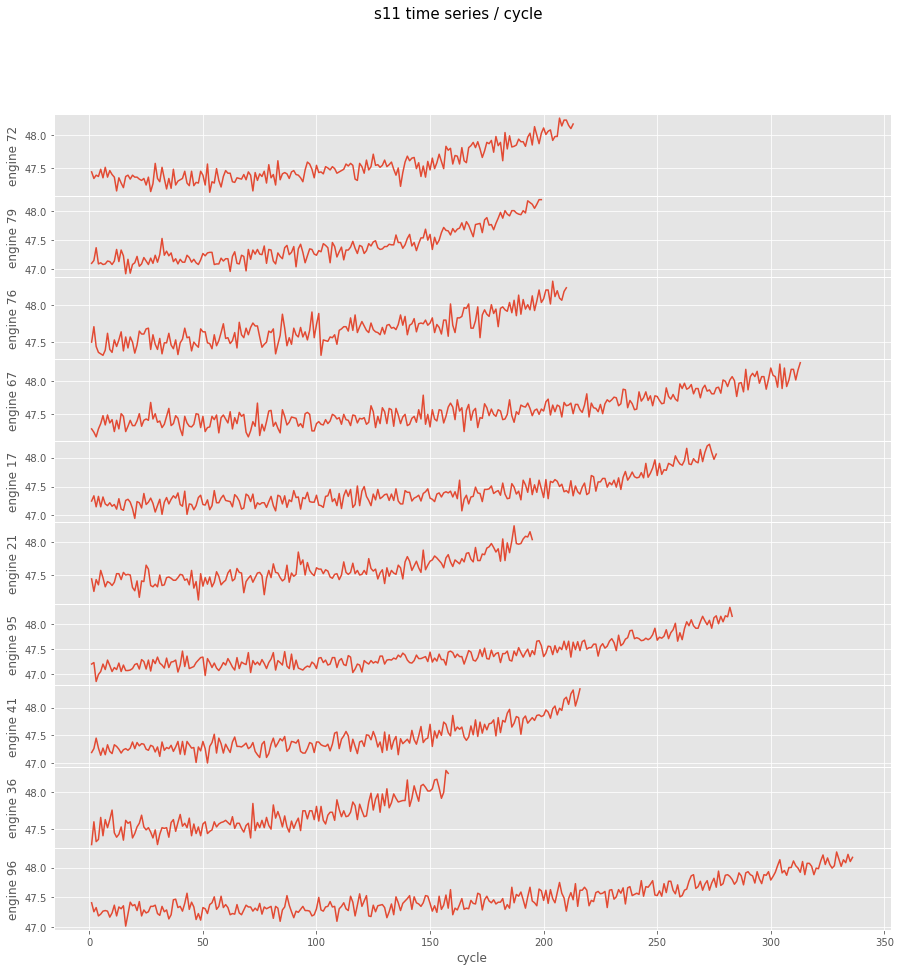

In [88]:
plot_time_series('s11')

### Task 2.6. Kiểm tra trên classifcation labels

In [89]:
# In binary classification label
print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))

0    20031
1      600
Name: label_bnc, dtype: int64

Negaitve samples =  97%

Posiitve samples =  3%


__Tập dữ liệu không cân bằng, vì vậy không nên phụ thuộc vào phân loại Độ chính xác làm thước đo hiệu suất mô hình. Có thể sử dụng AUC ROC để thay thế.__

In [90]:
# In multiclass classification label
print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

0    20031
1      300
2      300
Name: label_mcc, dtype: int64

Class 0 samples =  97%

Class 1 samples =  1%

Class 2 samples =  1%


__Nên sử dụng AUC ROC để đánh giá phân loại.__

## Task 3. EDA Summary

- Mối tương quan rất cao (> 0,8) giữa một số tính năng, ví dụ (s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). Sự đa cộng tuyến này có thể ảnh hưởng đến hiệu suất của một số thuật toán học máy. Vì vậy, một phần của các tính năng này sẽ là mục tiêu để loại bỏ trong việc lựa chọn tính năng trong giai đoạn mô hình hóa.

- Hầu hết các tính năng có mối quan hệ phi tuyến với TTF, do đó, việc thêm các phép biến đổi đa thức của chúng có thể nâng cao hiệu suất của mô hình.

- Hầu hết các tính năng thể hiện phân phối chuẩn có thể cải thiện hiệu suất của mô hình.

- AUC ROC nên được sử dụng để đánh giá mô hình phân loại thay vì Độ chính xác do sự mất cân bằng của lớp trong dữ liệu đào tạo.